In [204]:
import sys

sys.path.append('../')

from src.functions_env import DB_PATH
import sqlite3
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [205]:
conn = sqlite3.connect(DB_PATH)

In [206]:
df_identifiers = pd.read_sql_query("SELECT * FROM individual_identifiers", conn)
identifiers = pd.read_sql_query("SELECT * FROM identifiers", conn)
continent = pd.read_sql_query("SELECT * FROM country_continent", conn)

In [207]:
df = pd.merge(identifiers, df_identifiers, on = ['identifiers_wikidata_id', 'identifier_name'])
df = pd.merge(df, continent, on = 'country_name')
df['continent_name'][df['continent_name']=='Eurasia'] = 'Asia'

/var/folders/lx/9b13r6ln63jb54_3xlf9b_380000gn/T/ipykernel_61515/184260537.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



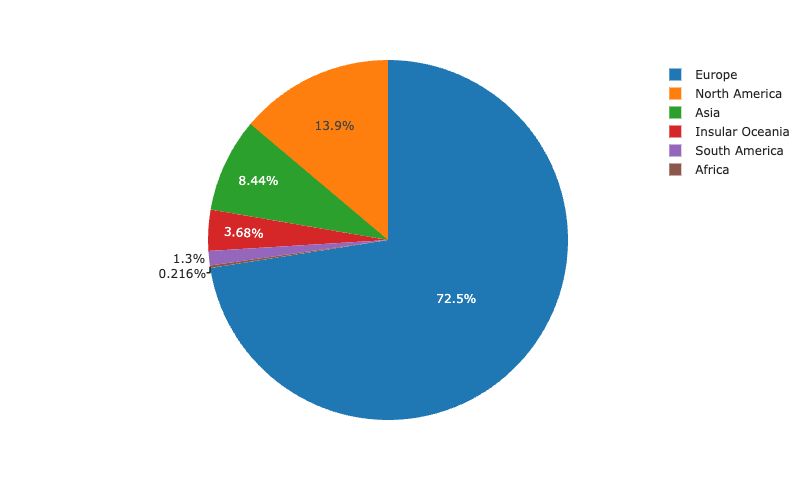

In [208]:
df_count_regions = df[['continent_name', 'identifier_name', 'count_records']].drop_duplicates()
df_count_regions = df_count_regions.dropna()

df_pie = df_count_regions.continent_name.value_counts().reset_index()
df_pie.columns = ['region', 'count_catalogs']

fig = px.pie(df_pie, names = 'region', values ='count_catalogs', width = 500, height = 500, template = 'simple_white')
#fig = fig.update_traces(textposition='inside', textinfo='percent+label')
fig

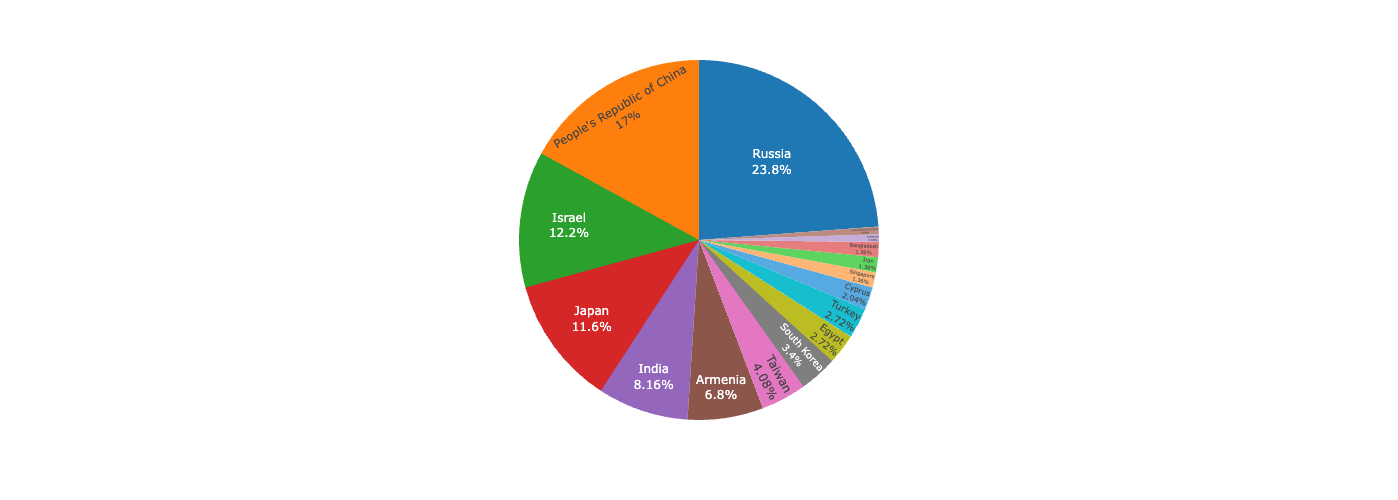

In [209]:
df_count_country = df[['continent_name', 'identifier_name', 'country_name']].drop_duplicates()
df_count_country = df_count_country.dropna()
df_count_country = df_count_country[df_count_country['continent_name']=='Asia']
df_count_country = df_count_country.country_name.value_counts().reset_index()
df_count_country.columns = ['country', 'count_catalogs']
fig = px.pie(df_count_country, names='country', values='count_catalogs', height = 500,width = 500, template = 'simple_white')
fig = fig.update_traces(textposition='inside', textinfo='percent+label')
fig = fig.update_layout(showlegend=False)
fig

In [210]:

df_count = df[['identifier_name', 'country_name', 'individual_wikidata_id']].drop_duplicates()
df_count['country_name'][df_count['country_name'].isna()] = "international"

df_international = df_count.groupby(['identifier_name', 'country_name'])['individual_wikidata_id'].count().reset_index().sort_values('individual_wikidata_id', ascending=False)

df_count = df_count.dropna()
df_count = df_count.groupby(['country_name', 'identifier_name'])['individual_wikidata_id'].count().reset_index()
df_count = df_count.sort_values(['country_name', 'individual_wikidata_id'], ascending = (False, False))
df_count = df_count.groupby('country_name').head(1).reset_index(drop=True)

In [211]:
df_count.sort_values('individual_wikidata_id', ascending=False)

,country_name,identifier_name,individual_wikidata_id
37,Germany,GND ID,121651
1,United States of America,Library of Congress authority ID,85710
38,France,IdRef ID,59075
17,Poland,NUKAT ID,44152
31,Israel,National Library of Israel J9U ID,35982
43,Czech Republic,NKCR AUT ID,35504
55,Australia,NLA Trove people ID,18259
2,United Kingdom,British Museum person or institution ID,17318
30,Italy,SHARE Catalogue author ID,15656
7,Sweden,SELIBR ID,14625


In [212]:
# crossig between catalogs in China, US and Israel

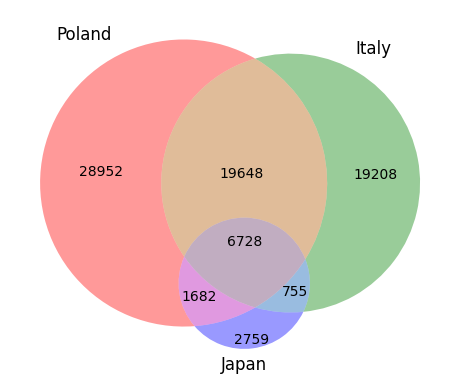

In [213]:
countries = ['Poland', "Italy", "Japan"]

df_cross = df[['individual_wikidata_id', 'country_name', 'identifier_name']].drop_duplicates()
df_cross = df_cross[df_cross['country_name'].isin(countries)].reset_index(drop=True)
df_cross = df_cross[['individual_wikidata_id', 'country_name']].drop_duplicates()

country_1 = df_cross[df_cross['country_name']==countries[0]]
country_2 = df_cross[df_cross['country_name']==countries[1]]
country_3 = df_cross[df_cross['country_name']==countries[2]]

# Define the sets
df_country_1 = set(country_1['individual_wikidata_id'])
df_country_2 = set(country_2['individual_wikidata_id'])
df_country_3 = set(country_3['individual_wikidata_id'])

# Create the Venn diagram
venn = venn3([df_country_1, df_country_2, df_country_3], set_labels=countries)

In [214]:
set(df.continent_name)

{'Africa',
 'Asia',
 'Europe',
 'Insular Oceania',
 'North America',
 'South America'}

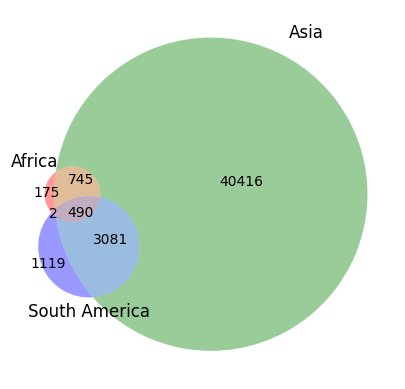

In [215]:
continents = ['Africa', "Asia", "South America"]

df_cross = df[['individual_wikidata_id', 'continent_name', 'identifier_name']].drop_duplicates()


df_cross = df_cross[df_cross['continent_name'].isin(continents)].reset_index(drop=True)
df_cross = df_cross[['individual_wikidata_id', 'continent_name']].drop_duplicates()

continent_1 = df_cross[df_cross['continent_name']==continents[0]]
continent_2 = df_cross[df_cross['continent_name']==continents[1]]
continent_3 = df_cross[df_cross['continent_name']==continents[2]]

# Define the sets
df_continent_1 = set(continent_1['individual_wikidata_id'])
df_continent_2 = set(continent_2['individual_wikidata_id'])
df_continent_3 = set(continent_3['individual_wikidata_id'])

# Create the Venn diagram
venn = venn3([df_continent_1, df_continent_2, df_continent_3], set_labels=continents)

In [216]:
#df.to_sql('top_catalog_country', conn, if_exists = 'replace', index=False)